<a href="https://colab.research.google.com/github/chirag912/pepper_rp_2/blob/master/ChatBotModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls /content/drive/My\ Drive/chatbot


ChatBotModel.ipynb     Deploy.zip     intents.json	README.md
ChatBotResponse.ipynb  intents0.json  model_ChatBot.h5


In [0]:
#pynaoqi-python-2.7-naoqi-x.x-linux32.tar.gz
!sudo apt-get install pip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package pip


In [0]:
# things we need for NLP
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import numpy as np
import random

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import utils
from keras import layers

import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Using TensorFlow backend.


In [0]:
# import our chat-bot intents file
import json
with open('/content/drive/My Drive/chatbot/intents.json') as json_data:
    intents = json.load(json_data)

In [0]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

# stem and lower each word and remove duplicates
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))

# remove duplicates
classes = sorted(list(set(classes)))

print (len(documents), "documents")
print (len(classes), "classes", classes)
print (len(words), "unique stemmed words", words)

36 documents
11 classes ['Phones', 'galaxy s10', 'goodbye', 'greeting', 'hours', 'iphone', 'noanswer', 'opentoday', 'payments', 'pixel', 'thanks']
54 unique stemmed words ["'s", 'a', 'acceiv', 'anyon', 'appl', 'ar', 'buy', 'bye', 'card', 'cash', 'credit', 'day', 'do', 'galaxy', 'good', 'goodby', 'googl', 'hav', 'hello', 'help', 'hi', 'hour', 'how', 'i', 'iphon', 'is', 'kind', 'lat', 'lik', 'mastercard', 'of', 'on', 'op', 'phon', 'pixel', 's10', 'samsung', 'see', 'smartphon', 'tak', 'thank', 'that', 'the', 'ther', 'to', 'today', 'want', 'what', 'when', 'would', 'x', 'xl', 'yo', 'you']


In [0]:
# create our training data
training = []
output = []
# create an empty array for our output
output_empty = [0] * len(classes)

# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)

    # output is a '0' for each tag and '1' for current tag
    output_row = list(output_empty)
    #print(classes.index(doc[1]))
    output_row[classes.index(doc[1])] = 1

    training.append([bag, output_row])

In [0]:
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)

# create train and test lists
train_x = list(training[:,0])
train_y = list(training[:,1])

In [0]:
model = Sequential()
model.add(Dense(8, input_shape=[len(train_x[0],)]))
model.add(Dense(8))
model.add(Dense(8))
model.add(Dense(len(train_y[0]), activation='softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])
history = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=8)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 440       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 11)                99        
Total params: 683
Trainable params: 683
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Epoch 1/1000
36/36 [==============================] - 1s 18ms/step - loss: 2.3994 - acc: 0.1111
Epoch 2/1000
36/36 [==============================] - 0s 273

In [0]:
model.save('model_ChatBot.h5')

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc'])

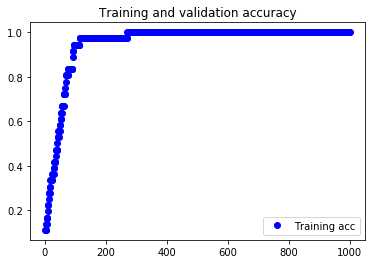

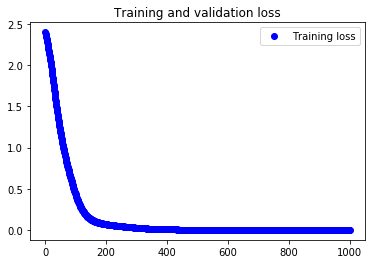

In [0]:
acc = history.history['acc']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
def clean_up_sentence(sentence):
    # tokenize the pattern
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

# return bag of words array: 0 or 1 for each word in the bag that exists in the sentence
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                bag[i] = 1
                if show_details:
                    print ("found in bag: %s" % w)

    return(np.array(bag))

In [0]:
p = bow("I would like to buy smartphone", words)
print (p)
print (classes)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0]
['Phones', 'galaxy s10', 'goodbye', 'greeting', 'hours', 'iphone', 'noanswer', 'opentoday', 'payments', 'pixel', 'thanks']


In [0]:
d = len(p)
f = len(documents)-2
a = np.zeros([f, d])

In [0]:
tot = np.vstack((p,a))

In [0]:
prediction = model.predict(tot)
predicted_index = np.argmax(prediction)
predicted_index

1